# EE610 - Image Processing 
## Assignment 2
## Keshav Singhal

In [98]:
import cv2 #importing useful libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50,15)
import numpy as np
from skimage import color, data, restoration
from skimage.util import random_noise
import random

In [2]:
def histogram_bw(img): #Function to generate histogram for greyscale image
    hist = np.zeros(256, dtype = int) #Initializing an array of range 0 to 255
    h, w = img.shape[:2] #Finds dimensions of image
    
    for i in range(h): #Spans the x-range
        for j in range(w): #Spans the y-range
            hist[img[i][j][1]] += 1  #Takes the value of intenstity of pixel and 
                                        #increments the index corresponding to it by one
    return hist/(h*w)

In [3]:
def histogram_col(img): #Function to generate histogram for Colour image
    hist_B = np.zeros(256, dtype = int) #Initializing an array of range 0 to 255 for colour Blue
    hist_G = np.zeros(256, dtype = int) #Initializing an array of range 0 to 255 for colour Green
    hist_R = np.zeros(256, dtype = int) #Initializing an array of range 0 to 255 for colour Red
    h, w = img.shape[:2] #Finds dimensions of image
    
    for i in range(h): #Spans the x-range
        for j in range(w): #Spans the y-range
            hist_B[img[i][j][0]] += 1  #Takes the value of intenstity of pixel and 
                                        #increments the index corresponding to it by one
            hist_G[img[i][j][1]] += 1  #For Green
            hist_R[img[i][j][2]] += 1  #For Red
                
    return hist_B/(h*w), hist_R/(h*w), hist_G/(h*w)

In [4]:
def magnitude(a): #Returns intensity of a colored pixel
    mag = (a[0] + a[1] + a[2])/3 #Arithmetic mean of BGR values is defined as intensity for the pixel
    return mag

### 1. Take a night time photo with your phone camera (if your phone camera is already very good, then borrow someone else’s phone) and try to enhance it by manipulating its histogram and reducing noise. It should still look natural and like a night time photo, but more details should be apparent than before.

In [5]:
image1 = cv2.imread('Night.jpg') #Reads the image

#Displaying the image
cv2.imshow('Night',image1)
cv2.waitKey(0) #Wait's for a keystroke
cv2.destroyAllWindows() #Destroys all windows after keystroke

h, w, i = image1.shape #Stores the values of height and width of image in 'h' and 'w'
print("Height = {},  Width = {}, Intensity ={}".format(h, w, i)) #Prints height and width



Height = 800,  Width = 600, Intensity =3


Original Image 
![night](Night.jpg)

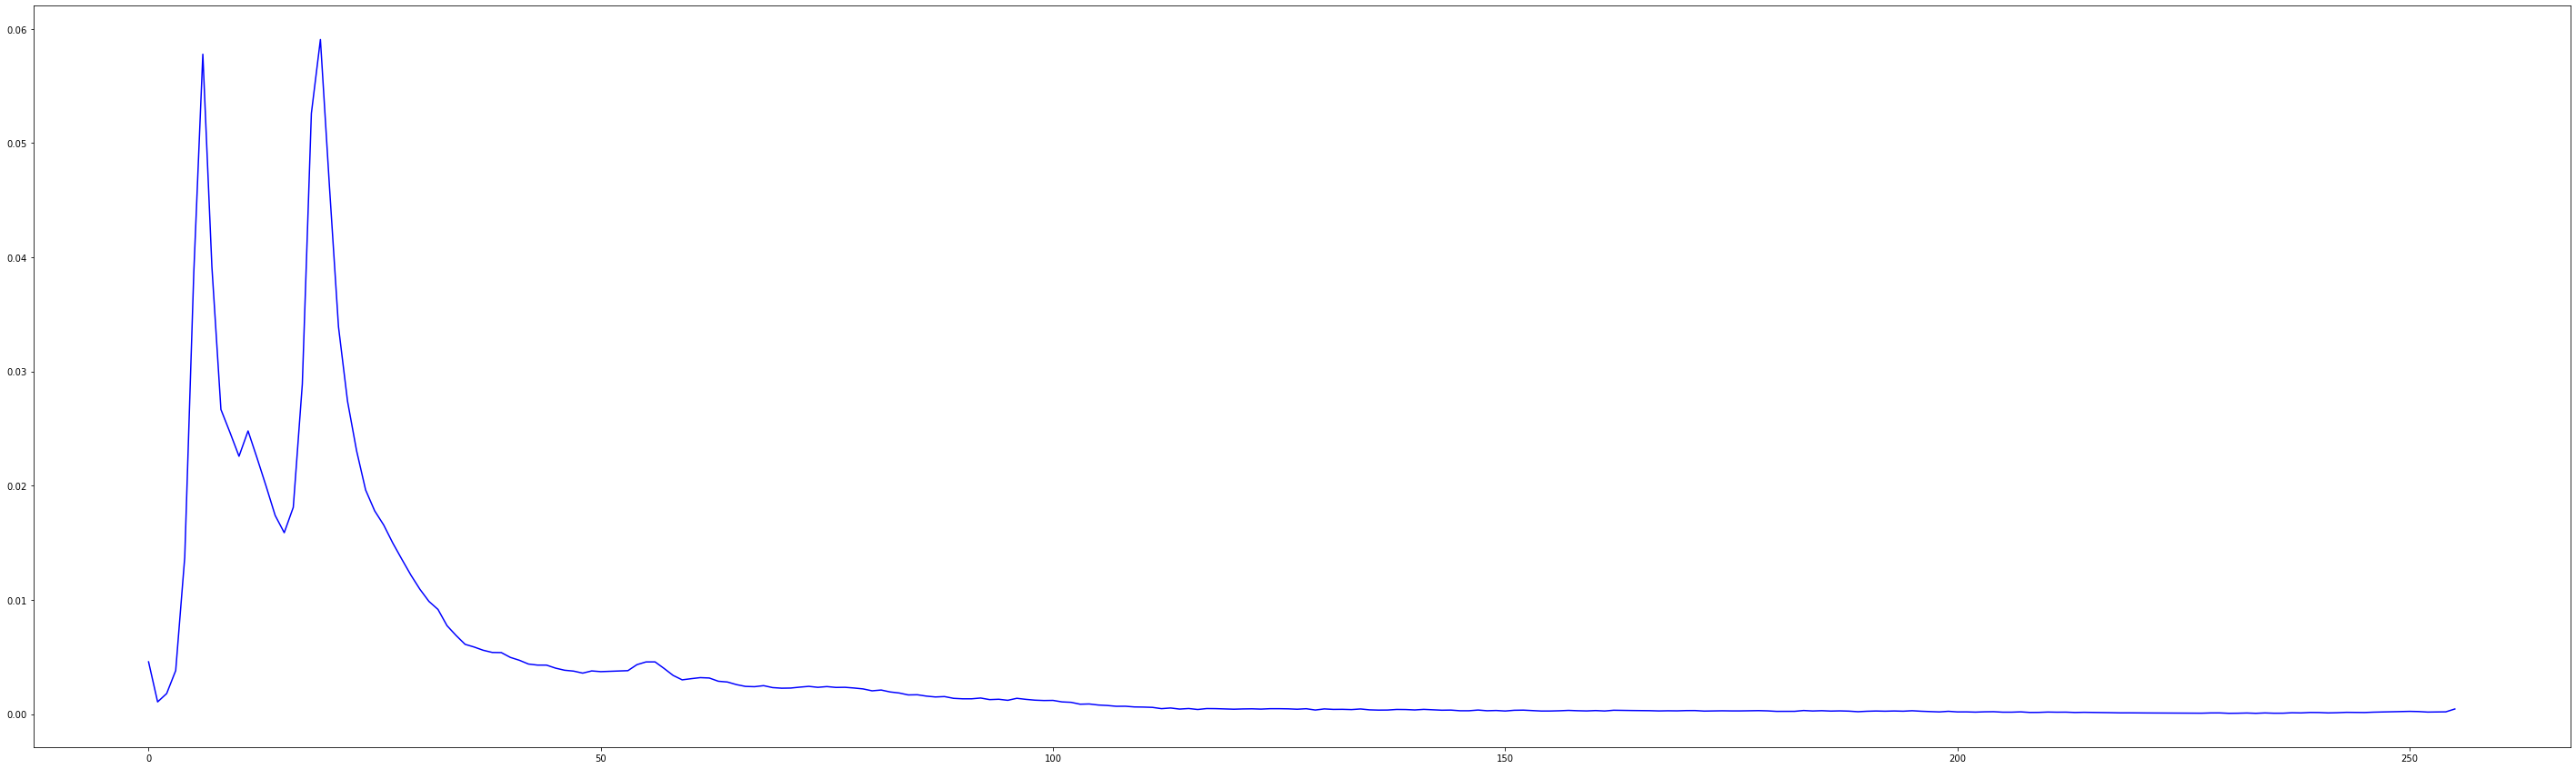

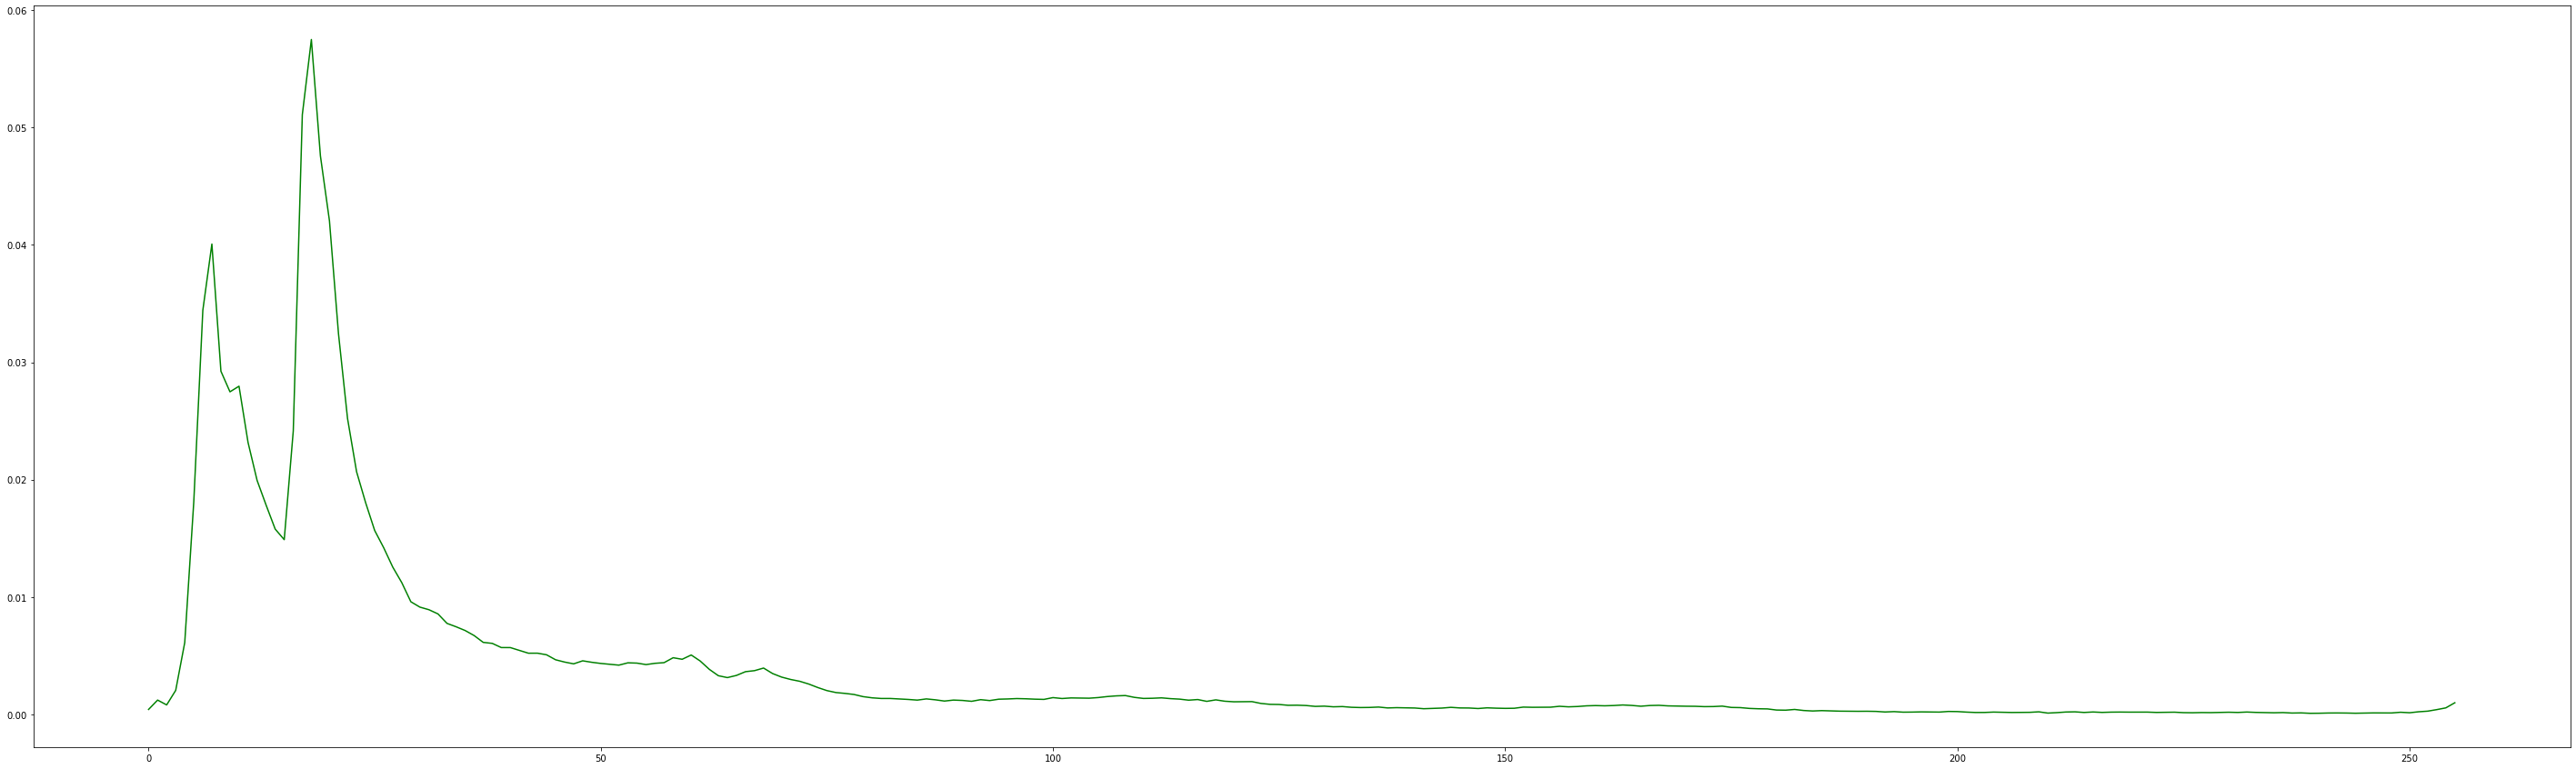

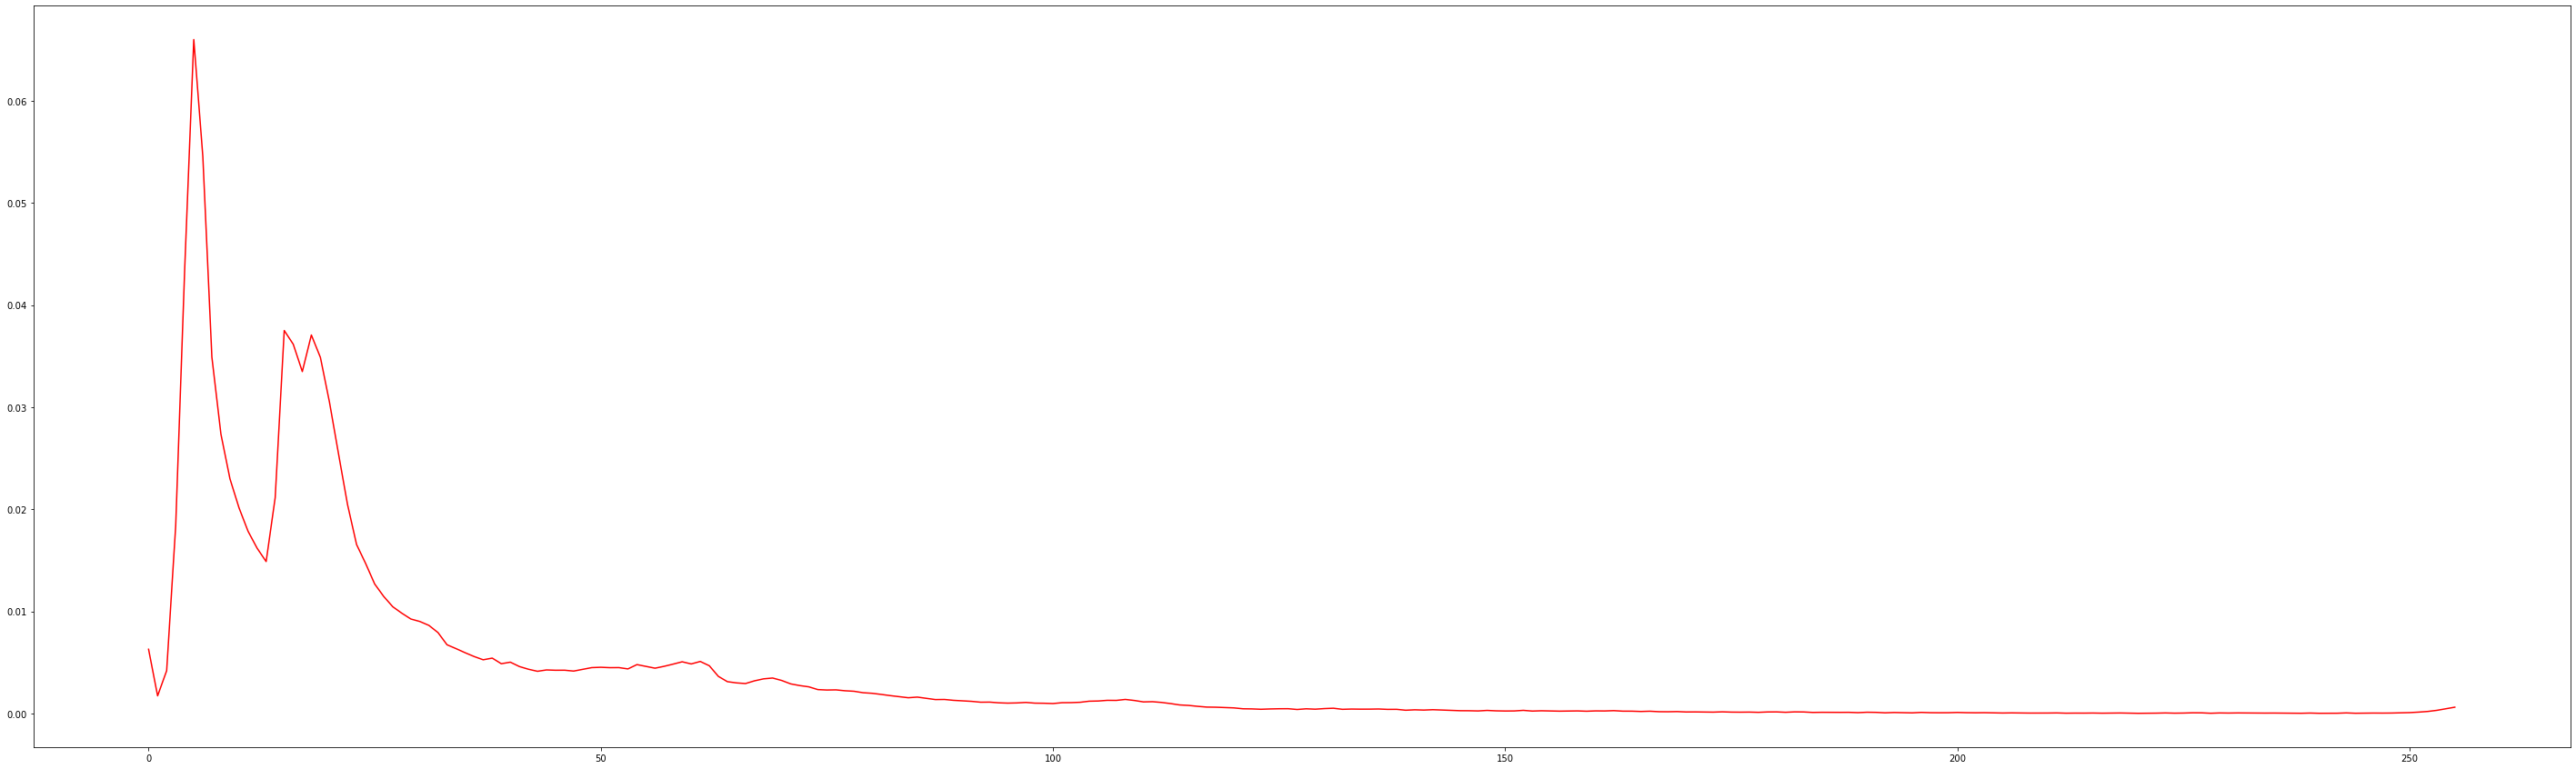

In [6]:
hist_B, hist_G, hist_R = histogram_col(image1) #Calling function to generate histogram

#Plotting histograms for BGR intensities seperately
plt.plot(hist_B, label = "Blue", color = 'b') 
plt.show()
plt.plot(hist_G, label = "Green", color = 'g')
plt.show()
plt.plot(hist_R, label = "Red", color = 'r')
plt.show()
#plt.legend()

The image lacks detail in darker regions, perhaps a gamma transform will enhance the image detail

In [7]:
def gamma(y,img): #Function to implement gamma transform
    h, w = img.shape[:2] #Finds dimensions of image
    
    for i in range(h): #Spans the x-range
        for j in range(w): #Spans the y-range
            img[i][j][0] = int(((float(img[i][j][0])/255.0)**y)*255) #Implements the power transform for Blue
            img[i][j][1] = int(((float(img[i][j][1])/255.0)**y)*255) #Implements the power transform for Green
            img[i][j][2] = int(((float(img[i][j][2])/255.0)**y)*255) #Implements the power transform for Red
    return img

In [8]:
night_gamma = gamma(0.7,image1.copy()) #Gamma = 0.7
# After several trials, I find the image with gamma = 0.7 the best

#Displaying the image
cv2.imshow('Night',night_gamma)
cv2.waitKey(0) #Wait's for a keystroke
cv2.destroyAllWindows() #Destroys all windows after keystroke

cv2.imwrite('gamma=0.7.jpg',night_gamma) #Saves the image

True

Enhanced Image 
![night](gamma=0.7.jpg)

The enhanced image with gamma = 0.7 has much better detail in darker regions without making the brighter regions too bright.

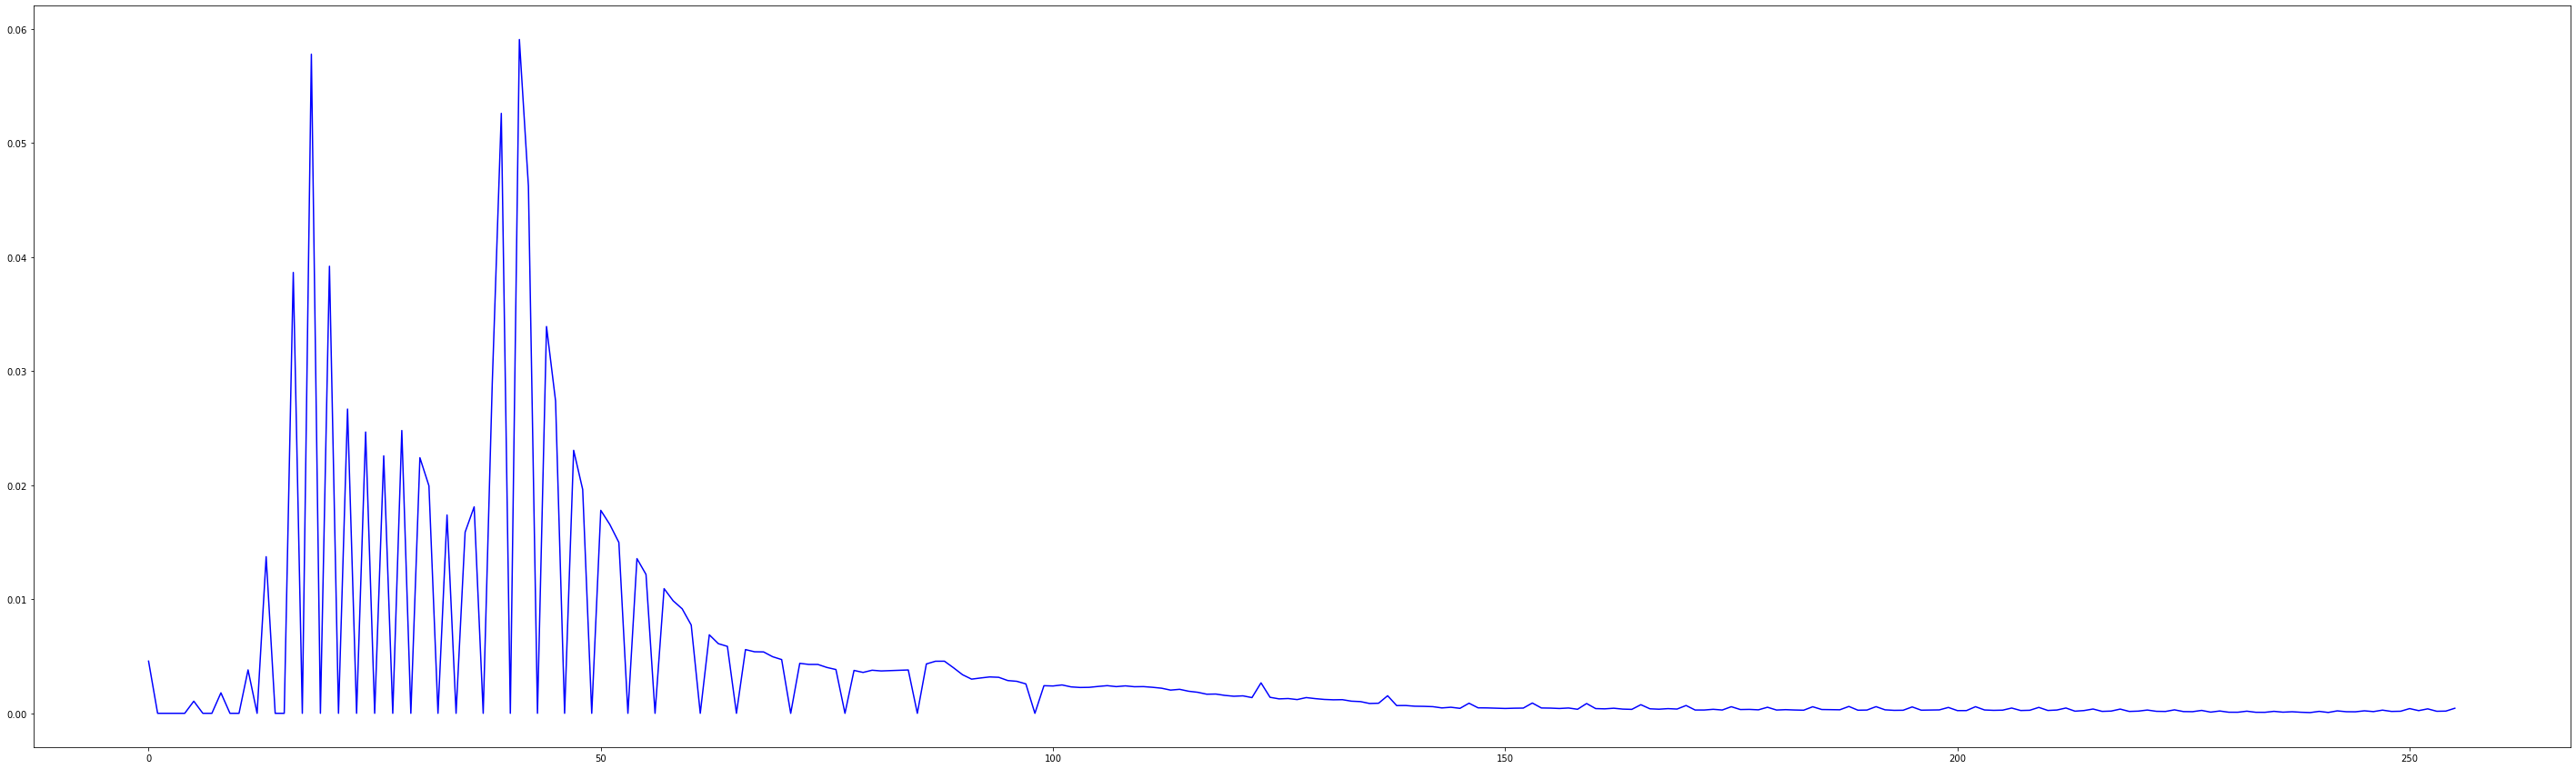

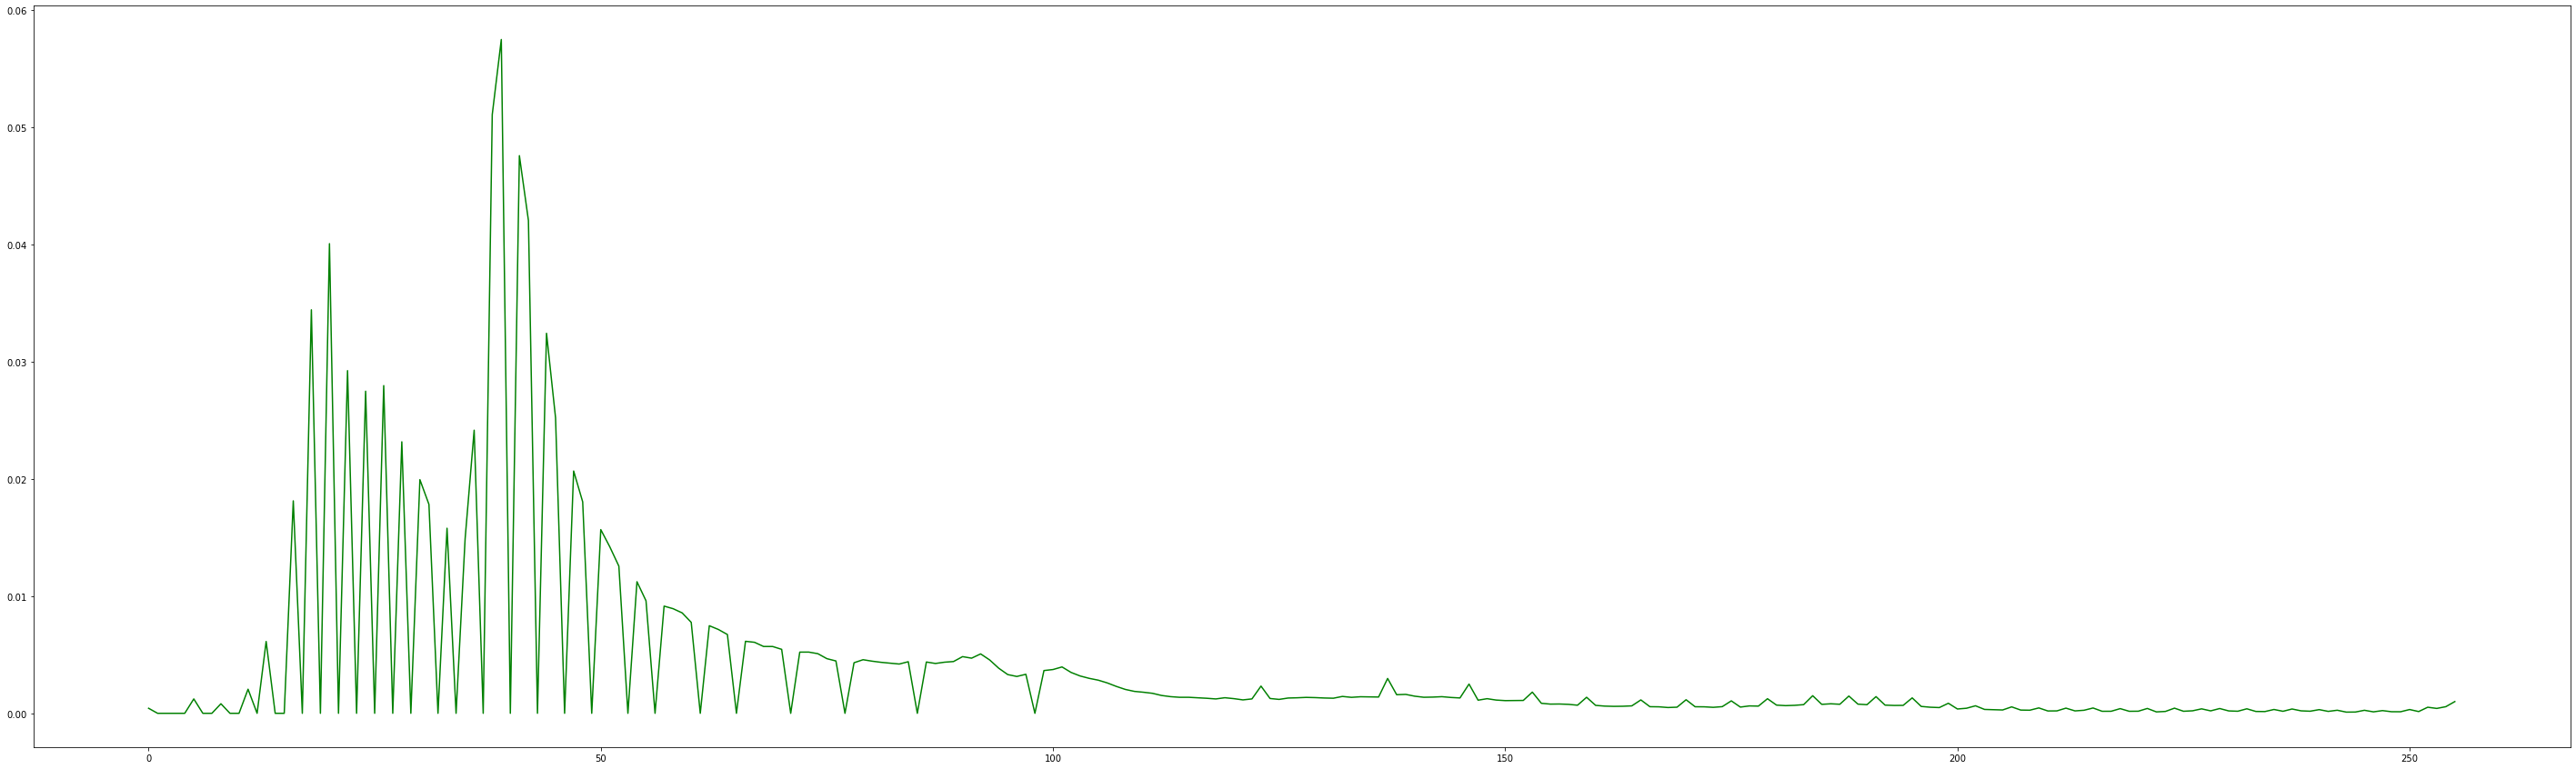

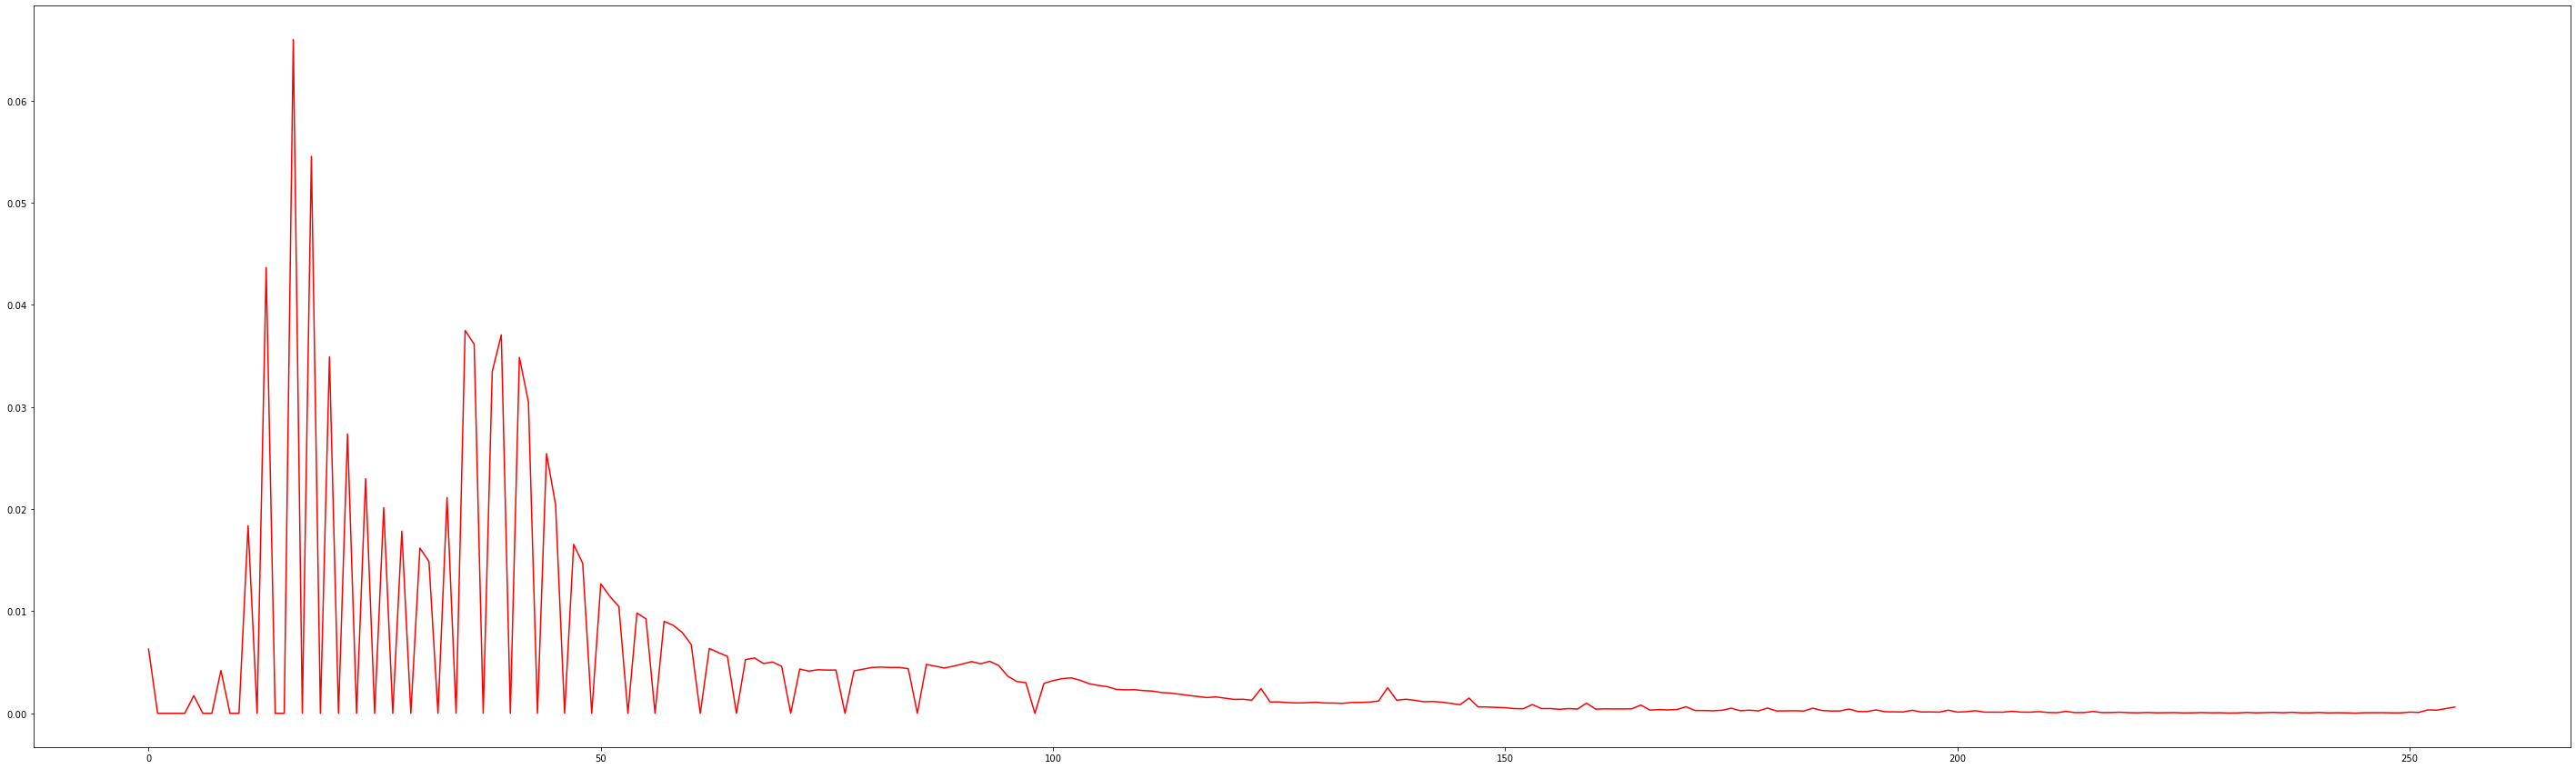

In [9]:
hist_B, hist_G, hist_R = histogram_col(night_gamma) #Calling function to generate histogram

#Plotting histograms for BGR intensities seperately
plt.plot(hist_B, label = "Blue", color = 'b') 
plt.show()
plt.plot(hist_G, label = "Green", color = 'g')
plt.show()
plt.plot(hist_R, label = "Red", color = 'r')
plt.show()
#plt.legend()

If we want more detail without decreasing the visual quality of the image by making the brighter regions even brighter using the gamma transform (which increases noise), perhaps we can achieve that by only increasing the contrast in the darker regions of the image by using a power transform which works only on a range of intensities and doesn't affect intensities outside the range

In [10]:
def power(y,img,n): #Function to implement custom power transform 
                     #n is the max intensity till which to perform power transform
    h, w = img.shape[:2] #Finds dimensions of image
    
    for i in range(h): #Spans the x-range
        for j in range(w): #Spans the y-range
            if(img[i][j][0] < n and img[i][j][1] < n and img[i][j][2] < n):
                img[i][j][0] = int(((float(img[i][j][0])/n)**y)*n) #Implements the power transform for Blue
                img[i][j][1] = int(((float(img[i][j][1])/n)**y)*n) #Implements the power transform for Green
                img[i][j][2] = int(((float(img[i][j][2])/n)**y)*n) #Implements the power transform for Red
    return img

In [11]:
night_power = power(0.7,image1.copy(), 127) #Gamma = 0.7
# The image with gamma = 0.7 but intensity level capped at 127

#Displaying the image
cv2.imshow('Night',night_power)
cv2.waitKey(0) #Wait's for a keystroke
cv2.destroyAllWindows() #Destroys all windows after keystroke

cv2.imwrite('power=0.7,n=127.jpg',night_power) #Saves the image

night_power = power(0.5,image1.copy(), 80) #Gamma = 0.7
# After several trials, I find the image with gamma = 0.5 and intensity capped at 80 the best

#Displaying the image
cv2.imshow('Night',night_power)
cv2.waitKey(0) #Wait's for a keystroke
cv2.destroyAllWindows() #Destroys all windows after keystroke

cv2.imwrite('power=0.5,n=80.jpg',night_power) #Saves the image

True

Enhanced Image with gamma = 0.5 and N = 80

![night](power=0.5,n=80.jpg)

The image here has much better detail than the original and also the one obtained after performing basic gamma transform at gamma = 0.7. Due to applying the power transform only on pixels with intensity less than 80, the brighter regions do not look more brighter giving the image a natural look and lesser noise than the one with gamma transform at gamma = 0.7.

The image still has some noise around the brighter regions which can be easily cleaned up using spatial filtering around the brighter regions

In [12]:
def mean_filter(img, x, y, n): # Arithmetic Mean filter to remove gaussian noise, x and y are window width and height respectively
                                #n is is the minimum intensity of pixel to perform noise filtering on
    img_new = img.copy()    #Copying the image
    h, w = img.shape[:2] #Finds dimensions of image
    
    for i in range(int((x-1)/2), h-int((x-1)/2)): #Spans the x-range but not corner cases to avoid indexing errors
        for j in range(int((y-1)/2), w-int((y-1)/2)): #Spans the y-range but not corner cases to avoid indexing errors
            if(img[i][j][0] > n and img[i][j][1] > n and img[i][j][2] > n): #Minimum limit on intensitty
                sum_b = 0 #Initializing sum variables
                sum_g = 0
                sum_r = 0
                for p in range(x): #Spans the window array
                    for q in range(y):
                        #Adding intensity values of pixels in the window
                        sum_b += img[i-int((x-1)/2)+p][j-int((y-1)/2)+q][0]
                        sum_g += img[i-int((x-1)/2)+p][j-int((y-1)/2)+q][1]
                        sum_r += img[i-int((x-1)/2)+p][j-int((y-1)/2)+q][2]
                        #Calculating the average
                        avg_b = sum_b/(x*y) 
                        avg_g = sum_g/(x*y) 
                        avg_r = sum_r/(x*y)
                        #Replacing the values in the new image with the mean filtered values for each colour
                        img_new[i][j][0] = avg_b
                        img_new[i][j][1] = avg_g
                        img_new[i][j][2] = avg_r
    return img_new

In [13]:
night_filter = mean_filter(night_power.copy(),3,3,160) #window = 3x3, minimum intensity = 160
# I find the image with above parameters the best looking

#Displaying the image
cv2.imshow('Night',night_filter)
cv2.waitKey(0) #Wait's for a keystroke
cv2.destroyAllWindows() #Destroys all windows after keystroke

cv2.imwrite('filter.jpg',night_filter) #Saves the image

True

Filtered Image
![](filter.jpg)

The filtered image is smoother around brighter regions. As the filter works selectively on bright regions, the level of detail is retained in darker regions. The light circles around the moon look smoother as well as the windows but some sharpness is reduced in the leaves in front of the window. 

### 2. Remove the newspaper-ink-dot effect and try to make the image at https://momofilmfest.com/wp-content/uploads/2020/01/newspaper-dots.jpg more natural-looking. [2]

In [14]:
newspaper = cv2.imread('newspaper-dots.jpeg') #Reads the image

#Displaying the image
cv2.imshow('Newspaper',newspaper)
cv2.waitKey(0) #Wait's for a keystroke
cv2.destroyAllWindows() #Destroys all windows after keystroke

h, w, i = newspaper.shape #Stores the values of height and width of image in 'h' and 'w'
print("Height = {},  Width = {}, Intensity ={}".format(h, w, i)) #Prints height and width

Height = 477,  Width = 320, Intensity =3


Original Image
![](newspaper-dots.jpeg)

To remove the newspaper ink-dot effect, we will have to inspect the Fourier Transform of the image first

In [15]:
def bw_array(img): #Function to store Greyscale intensity values in a 2-D array
    h, w = img.shape[:2] #Finds dimensions of image
    img_bw = np.zeros((h,w))
    
    for i in range(h): #Spans the x-range
        for j in range(w):#Spans the y-range
            img_bw[i][j] = sum(img[i][j])/3  # Average of the BGR pixel values
    return img_bw

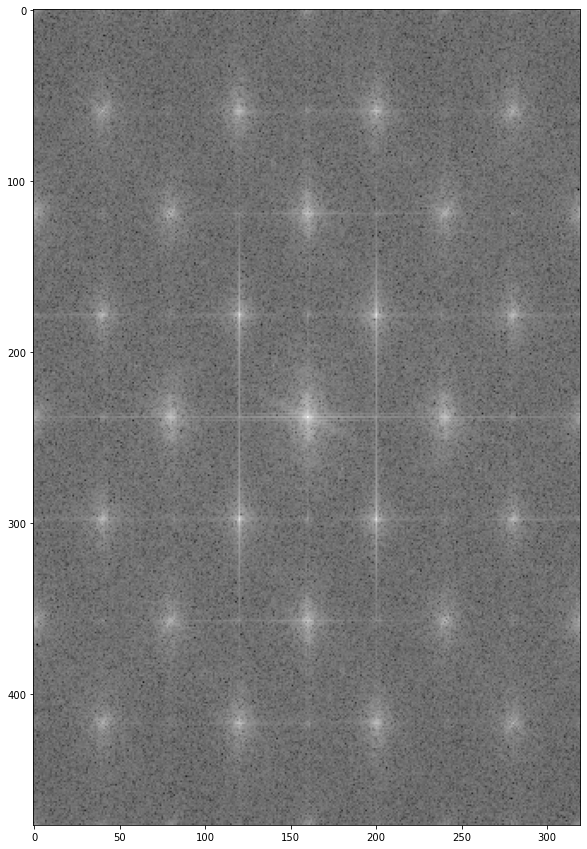

In [16]:
newspaper_bw = bw_array(newspaper) #Converts the pixel vectors from 3-D BGR to 1-D Greyscale to compute DFT

#DFT of image credits: https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html
dft = cv2.dft(np.float32(newspaper_bw),flags = cv2.DFT_COMPLEX_OUTPUT) #Implements the DFT
dft_shift = np.fft.fftshift(dft) #Shifts DFT origin to point [h/2,w/2]
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))#Taking the magnitude spectrum
plt.imshow(magnitude_spectrum, cmap = 'gray') #Plotting the magnitude spectrum

To remove the newspaper dot-ink effect, butterworth notch reject filters can be used 

In [17]:
def butterworth_notch_reject(mask,x,y,r): #Function to implement a buuterworth notch reject filter
                                        # x,y are the co-ordinates of the center and r is the radius
    h, w = mask.shape[:2] #Finds dimensions of mask
    mask_n = mask.copy()
    for i in range(h): #Spans the x-range
        for j in range(w): #Spans the y-range
            dist2 = (x-i)**2 + (y-j)**2 #Finds distance from the center of notch filter
            if(dist2 <= r*r): #If distance is less than radius of filter, then pixel value = 0
                mask_n[i][j] = 0
    return mask_n

In [18]:
def filter_m(dft,mask):
    dft_new = dft.copy()
    h, w = mask.shape[:2] #Finds dimensions of mask
    for i in range(h): #Spans the x-range
        for j in range(w): #Spans the y-range
            dft_new[i][j][0] = dft[i][j][0]*mask[i][j]
            dft_new[i][j][1] = dft[i][j][1]*mask[i][j]
    return dft_new

<ipython-input-19-4fcaa2af9c8b>:31: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(cv2.magnitude(dft_filtered[:,:,0],dft_filtered[:,:,1]))


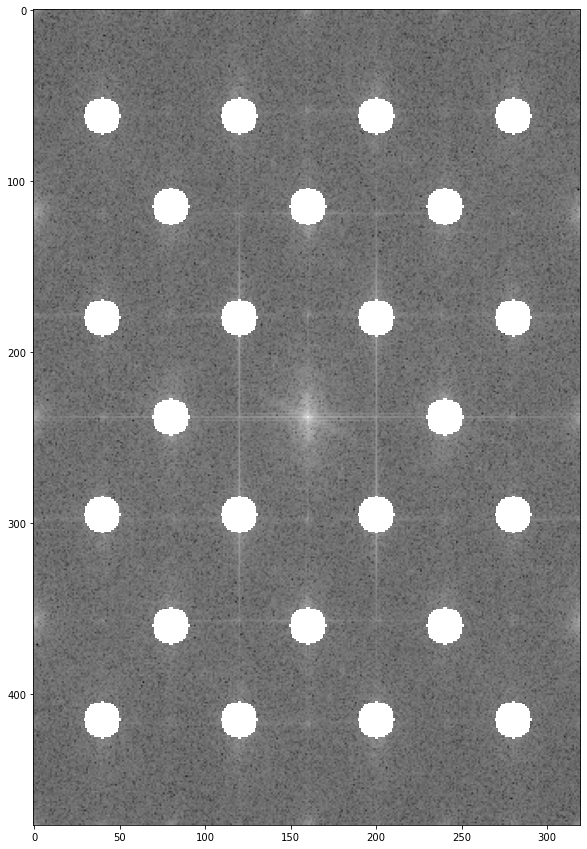

In [19]:
h, w = newspaper_bw.shape[:2] #Finds dimensions of image
mask = np.ones((h,w),np.uint8)  #Copying the image into mask

        
mask1 = butterworth_notch_reject(mask,295,120,10)
mask2 = butterworth_notch_reject(mask1,295,200,10)
mask3 = butterworth_notch_reject(mask2,180,120,10)
mask4 = butterworth_notch_reject(mask3,180,200,10)
mask5 = butterworth_notch_reject(mask4,115,160,10)
mask6 = butterworth_notch_reject(mask5,360,160,10)
mask7 = butterworth_notch_reject(mask6,238,80,10)
mask8 = butterworth_notch_reject(mask7,238,240,10)
mask9 = butterworth_notch_reject(mask8,360,80,10)
mask10 = butterworth_notch_reject(mask9,360,240,10)
mask11 = butterworth_notch_reject(mask10,415,120,10)
mask12 = butterworth_notch_reject(mask11,415,200,10)
mask13 = butterworth_notch_reject(mask12,295,40,10)
mask14 = butterworth_notch_reject(mask13,295,280,10)
mask15 = butterworth_notch_reject(mask14,180,40,10)
mask16 = butterworth_notch_reject(mask15,180,280,10)
mask17 = butterworth_notch_reject(mask16,115,80,10)
mask18 = butterworth_notch_reject(mask17,115,240,10)
mask19 = butterworth_notch_reject(mask18,62,120,10)
mask20 = butterworth_notch_reject(mask19,62,200,10)
mask21 = butterworth_notch_reject(mask20,415,40,10)
mask22 = butterworth_notch_reject(mask21,415,280,10)
mask23 = butterworth_notch_reject(mask22,62,40,10)
mask24 = butterworth_notch_reject(mask23,62,280,10)

dft_filtered = filter_m(dft_shift,mask24)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_filtered[:,:,0],dft_filtered[:,:,1]))
plt.imshow(magnitude_spectrum, cmap = 'gray')
#plt.imshow(mask1[], cmap = 'gray')

This is the Fourier Transform Obtained after applying multiple Notch Reject Filters. 

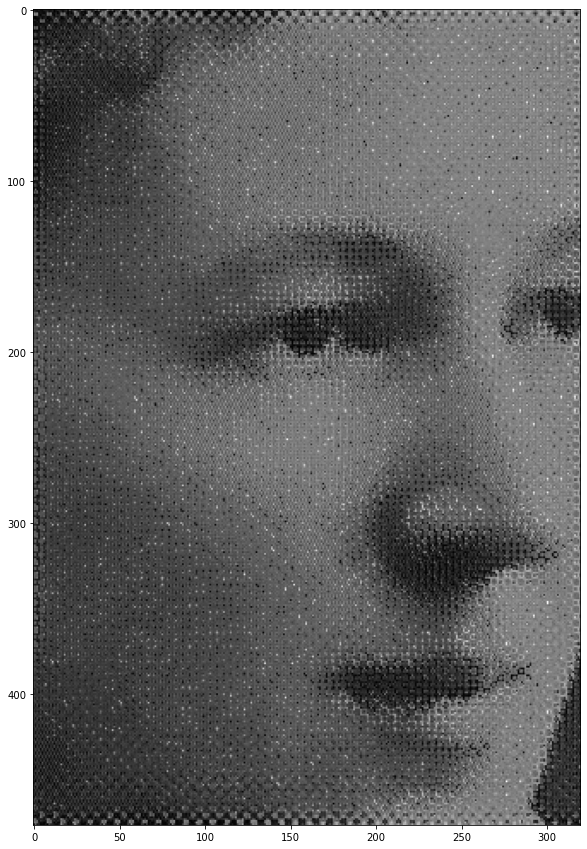

In [20]:
#inverse DFT  credits: https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html
fshift = dft_filtered #copying the filtered dft obtained
f_ishift = np.fft.ifftshift(fshift) #computing the inverse DFT
img_back = cv2.idft(f_ishift) #Obtaining the image back
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1]) #Constructing the image from inverse DFT of DFT
plt.imshow(img_back, cmap = 'gray') #Plotting the image
plt.imsave('newspaper_filter.png', img_back, cmap = 'gray') #Saving the image

The image obtained upon Inverse DFT of the filtered DFT is almost completely rid of the Newspaper ink-dot effect

### 3. Triton is the largest of Neptune’s satellites (moons), and is the most unusual in our solar system as it orbits its planet in the opposite direction to the planet’s rotation. One of its images taken by Voyager 2 in 1989 is hosted at https://www.wired.com/images_blogs/thisdayintech/2009/08/triton_voyager2.jpg. This picture seems to have some subtle horizontal (and possibly vertical) scan lines. Enhance this image by removing the scanning artifacts. Also try to reveal more details by manipulating the histogram. You can choose to work on a sub-image or a gray scale version, but for full marks maintain the color balance (ratio of R:G:B at each pixel) and work with all three channels and show the final result on the entire (or a large portion of the) image. [3]

In [21]:
def color_array(img): #Function to store color intensity values in seperate arrays
    h, w = img.shape[:2] #Finds dimensions of image
    img_b = np.zeros((h,w))
    img_g = np.zeros((h,w))
    img_r = np.zeros((h,w))
    
    for i in range(h): #Spans the x-range
        for j in range(w): #Spans the y-range
            img_b[i][j] = img[i][j][0] #Copies the Blue intensities in img_b
            img_g[i][j] = img[i][j][1] #Copies the Green intensities in img_g
            img_r[i][j] = img[i][j][2] #Copies the Red intensities in img_r
    return img_b,img_g,img_r

In [22]:
def array_to_color(img,img_b,img_g,img_r): #Function to restore image from color intensity values in seperate arrays
    h, w = img.shape[:2] #Finds dimensions of image
    
    for i in range(h): #Spans the x-range
        for j in range(w): #Spans the y-range
            img[i][j][0] = img_b[i][j] #Copies the Blue intensities 
            img[i][j][1] = img_g[i][j] #Copies the Green intensities 
            img[i][j][2] = img_r[i][j] #Copies the Red intensities
    return img

In [23]:
triton = cv2.imread('triton_voyager2.jpeg') #Reads the image

#Displaying the image
cv2.imshow('triton',triton)
cv2.waitKey(0) #Wait's for a keystroke
cv2.destroyAllWindows() #Destroys all windows after keystroke

h, w, i = triton.shape #Stores the values of height and width of image in 'h' and 'w'
print("Height = {},  Width = {}, Intensity ={}".format(h, w, i)) #Prints height and width

Height = 551,  Width = 680, Intensity =3


Original Image 
![](triton_voyager2.jpeg)

To remove the both Vertical and Horizontal Scan Lines, horizontal and vertical notch reject filters needs to be implemented, respectively.

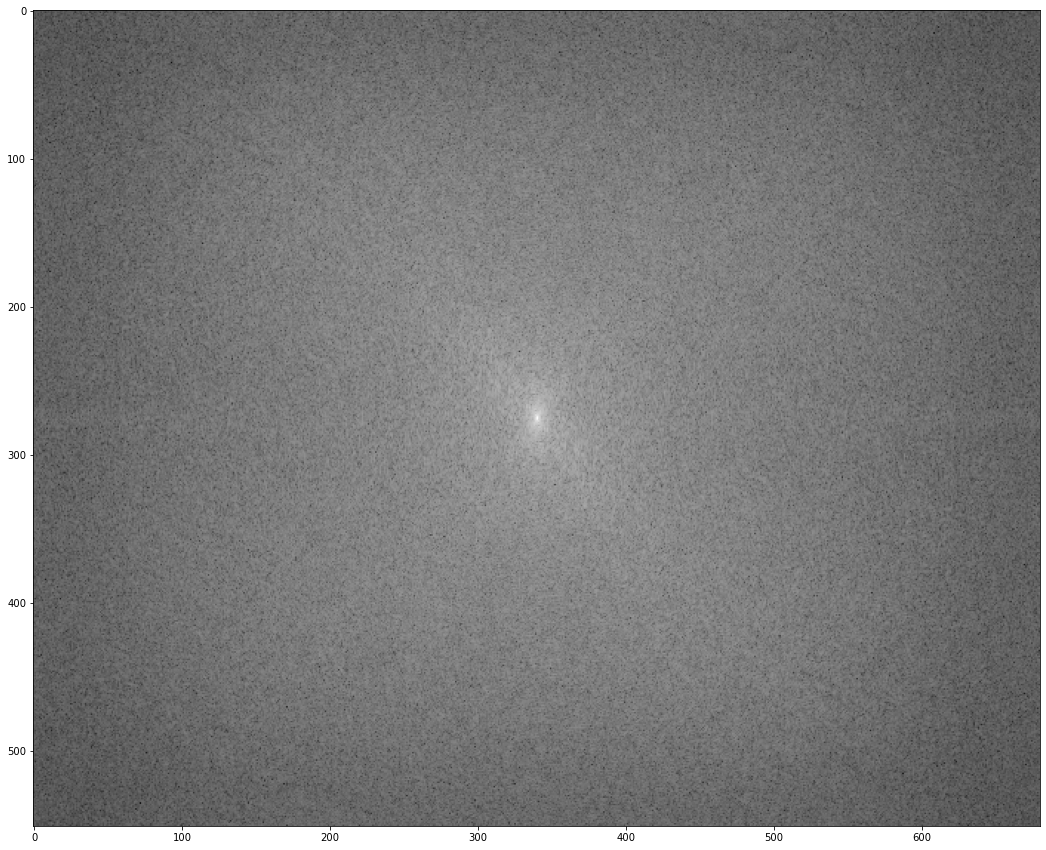

In [24]:
image_b, image_g, image_r = color_array(triton) #Getting seperate arrays for BGR intensity values


#DFT of image credits: https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html
dft_r = cv2.dft(np.float32(image_r),flags = cv2.DFT_COMPLEX_OUTPUT) #Implements the DFT for Red Intensities
dft_shift_r = np.fft.fftshift(dft_r) #Shifts DFT origin to point [h/2,w/2]

dft_g = cv2.dft(np.float32(image_g),flags = cv2.DFT_COMPLEX_OUTPUT) #Implements the DFT for Green Intensities
dft_shift_g = np.fft.fftshift(dft_g) #Shifts DFT origin to point [h/2,w/2]

dft_b = cv2.dft(np.float32(image_b),flags = cv2.DFT_COMPLEX_OUTPUT) #Implements the DFT for Blue Intensities
dft_shift_b = np.fft.fftshift(dft_b) #Shifts DFT origin to point [h/2,w/2]

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift_r[:,:,0],dft_shift_r[:,:,1]))#Taking the magnitude spectrum
plt.imshow(magnitude_spectrum, cmap = 'gray') #Plotting the magnitude spectrum For Red Intensities

In [25]:
def horizontal_notch_reject(mask,x,y,r,t): #Function to implement a horizontal notch reject filter
                                        # x,y are the co-ordinates of the center
                            # r is the distance from origin to be unaffected and t is the width of the line
    h, w = mask.shape[:2] #Finds dimensions of mask
    mask_n = mask.copy()
    for i in range(h): #Spans the x-range
        for j in range(w): #Spans the y-range
            if(abs(x-i) < t/2): #If distance from center x-line is less than w
                if(abs(y-j) > r): #If distance from center is greater than r
                    mask_n[i][j] = 0 #Convert the value to zero
    return mask_n

In [26]:
def vertical_notch_reject(mask,x,y,r,t): #Function to implement a horizontal notch reject filter
                                        # x,y are the co-ordinates of the center
                            # r is the distance from origin to be unaffected and w is the width of the line
    h, w = mask.shape[:2] #Finds dimensions of mask
    mask_n = mask.copy()
    for i in range(h): #Spans the x-range
        for j in range(w): #Spans the y-range
            if(abs(j-y) < t/2): #If distance from center x-line is less than w
                if(abs(i-x) > r): #If distance from center is greater than r
                    mask_n[i][j] = 0 #Convert the value to zero
    return mask_n

<ipython-input-27-9d60b4a6280b>:12: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(cv2.magnitude(dft_filtered_r[:,:,0],dft_filtered_r[:,:,1]))


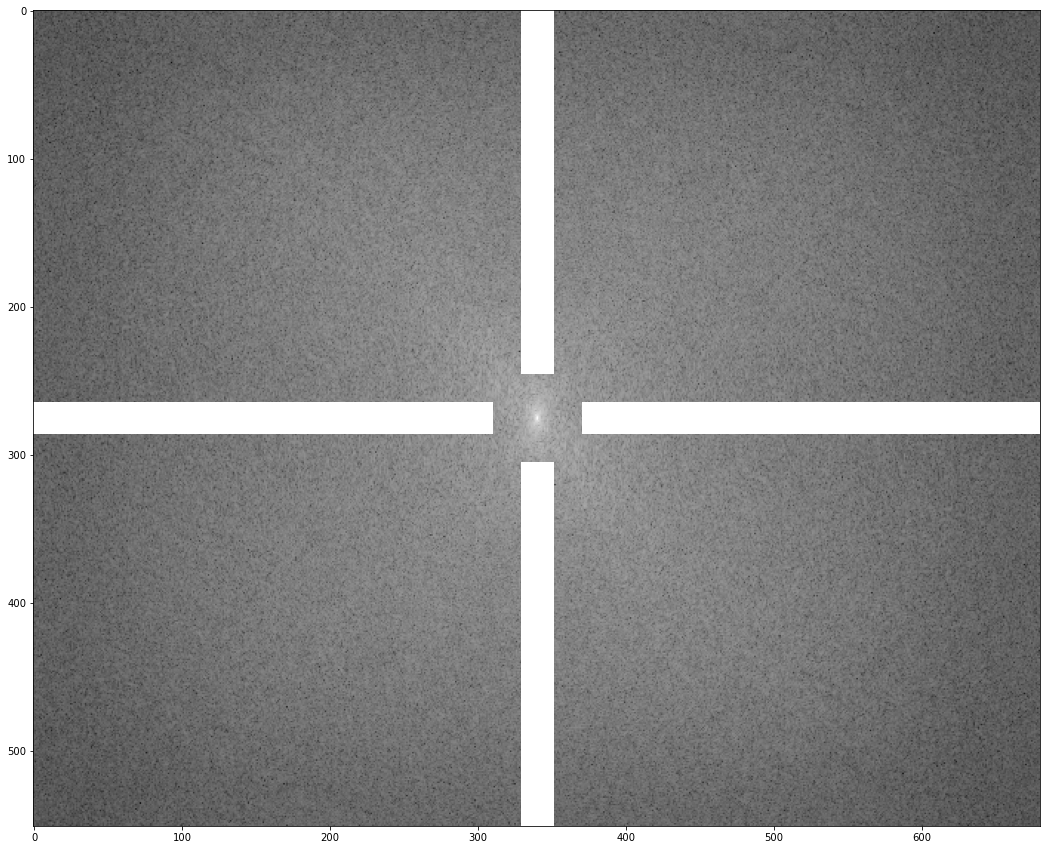

In [27]:
h, w = image_r.shape[:2] #Finds dimensions of image
mask = np.ones((h,w),np.uint8)  #Copying the image into mask

        
mask_hor = horizontal_notch_reject(mask,275,340,30,21)
mask_hor_ver = vertical_notch_reject(mask_hor,275,340,30,21)

dft_filtered_r = filter_m(dft_shift_r,mask_hor_ver)
dft_filtered_g = filter_m(dft_shift_g,mask_hor_ver)
dft_filtered_b = filter_m(dft_shift_b,mask_hor_ver)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_filtered_r[:,:,0],dft_filtered_r[:,:,1]))
plt.imshow(magnitude_spectrum, cmap = 'gray')

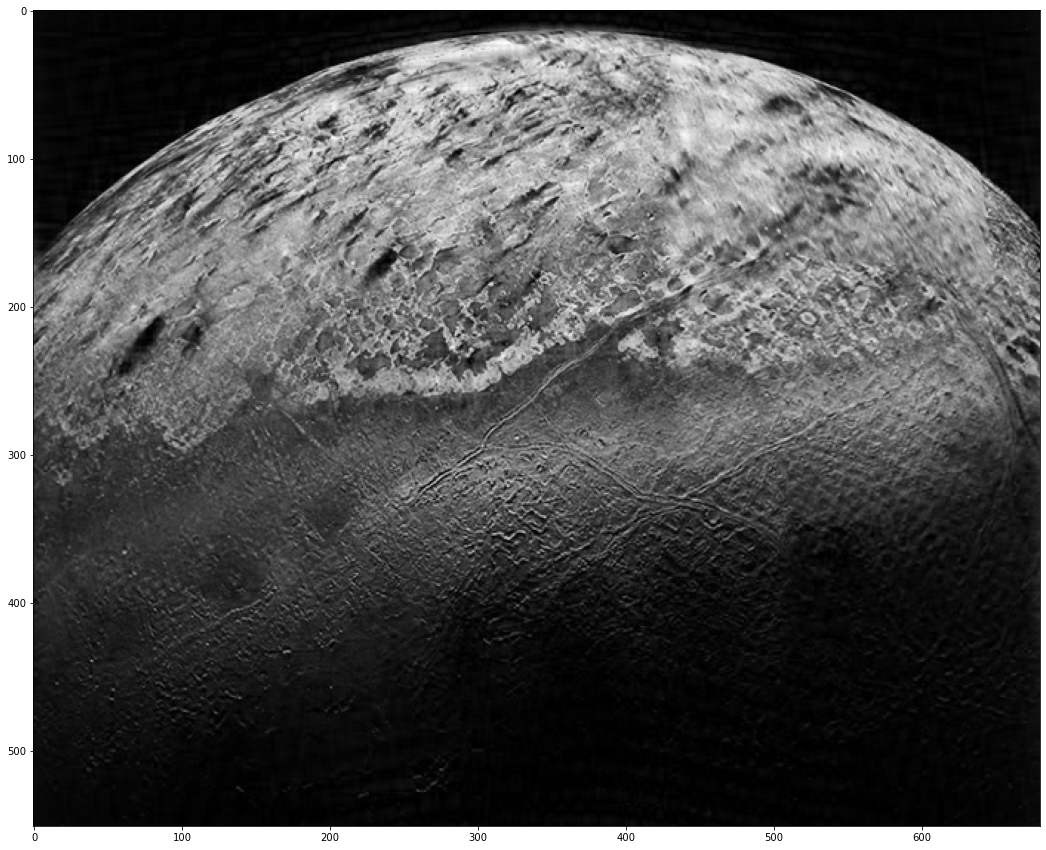

In [28]:
f_shift = dft_filtered_r    #copying the filtered dft obtained
f_ishift = np.fft.ifftshift(f_shift) #computing the inverse DFT
img_back = cv2.idft(f_ishift) 
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1]) #Constructing the image from inverse DFT of DFT
plt.imshow(img_back, cmap = 'gray') #Plotting the image
plt.imsave('test.png', img_back, cmap = 'gray') #Saving the image

In [29]:
f_ishift_b = np.fft.ifftshift(dft_filtered_b) #computing the inverse DFT
img_back_b = cv2.idft(f_ishift_b) 
img_back_b = cv2.magnitude(img_back_b[:,:,0],img_back_b[:,:,1]) #Constructing the image from inverse DFT of DFT

f_ishift_g = np.fft.ifftshift(dft_filtered_g) #computing the inverse DFT
img_back_g = cv2.idft(f_ishift_g) 
img_back_g = cv2.magnitude(img_back_g[:,:,0],img_back_g[:,:,1]) #Constructing the image from inverse DFT of DFT

f_ishift_r = np.fft.ifftshift(dft_filtered_r) #computing the inverse DFT
img_back_r = cv2.idft(f_ishift_r) 
img_back_r = cv2.magnitude(img_back_r[:,:,0],img_back_r[:,:,1]) #Constructing the image from inverse DFT of DFT

triton_new = triton.copy()

b_max = np.amax(img_back_b)
g_max = np.amax(img_back_g)
r_max = np.amax(img_back_r)

triton_new = array_to_color(triton_new,255*img_back_b/b_max,255*img_back_g/g_max,255*img_back_r/r_max)

print(np.amax(img_back_g))

115899700.0


In [30]:
#Displaying the image
cv2.imshow('Triton',triton_new)
cv2.waitKey(0) #Wait's for a keystroke
cv2.destroyAllWindows() #Destroys all windows after keystroke

cv2.imwrite('triton_new.jpg',triton_new) #Saves the image

True

Filtered Image
![](triton_new.jpg)

The notch reject filters have gotten rif of the subtle scan lines in the image and lot of the major ones are gone too.

In [31]:
triton_enhanced = power(1.2,triton_new.copy(), 127) #Gamma = 1.2
# The image with gamma = 1.2 but intensity level capped at 127

#Displaying the image
cv2.imshow('Night',triton_enhanced)
cv2.waitKey(0) #Wait's for a keystroke
cv2.destroyAllWindows() #Destroys all windows after keystroke

cv2.imwrite('triton_enhanced.jpg',triton_enhanced) #Saves the image



True

Enhanced Image
![](triton_enhanced.jpg)

The image above is the final image with removed scan lines and altered histogram. It looks much clearer than the original

### 4. A picture of a car blurred due to the relative motion of the camera is given at https://www.ee.iitb.ac.in/~asethi/Dump/MakeNumberPlateReadable.jpg. Restore and enhance the picture to reveal the numbers and letters on the number (license) plate.

In [62]:
car_blur = cv2.imread('MakeNumberPlateReadable.jpeg') #Reads the image

#Displaying the image
cv2.imshow('%car_blur',car_blur)
cv2.waitKey(0) #Wait's for a keystroke
cv2.destroyAllWindows() #Destroys all windows after keystroke

h, w, i = triton.shape #Stores the values of height and width of image in 'h' and 'w'
print("Height = {},  Width = {}, Intensity ={}".format(h, w, i)) #Prints height and width
car_b,car_g,car_r = color_array(car_blur)

Height = 551,  Width = 680, Intensity =3


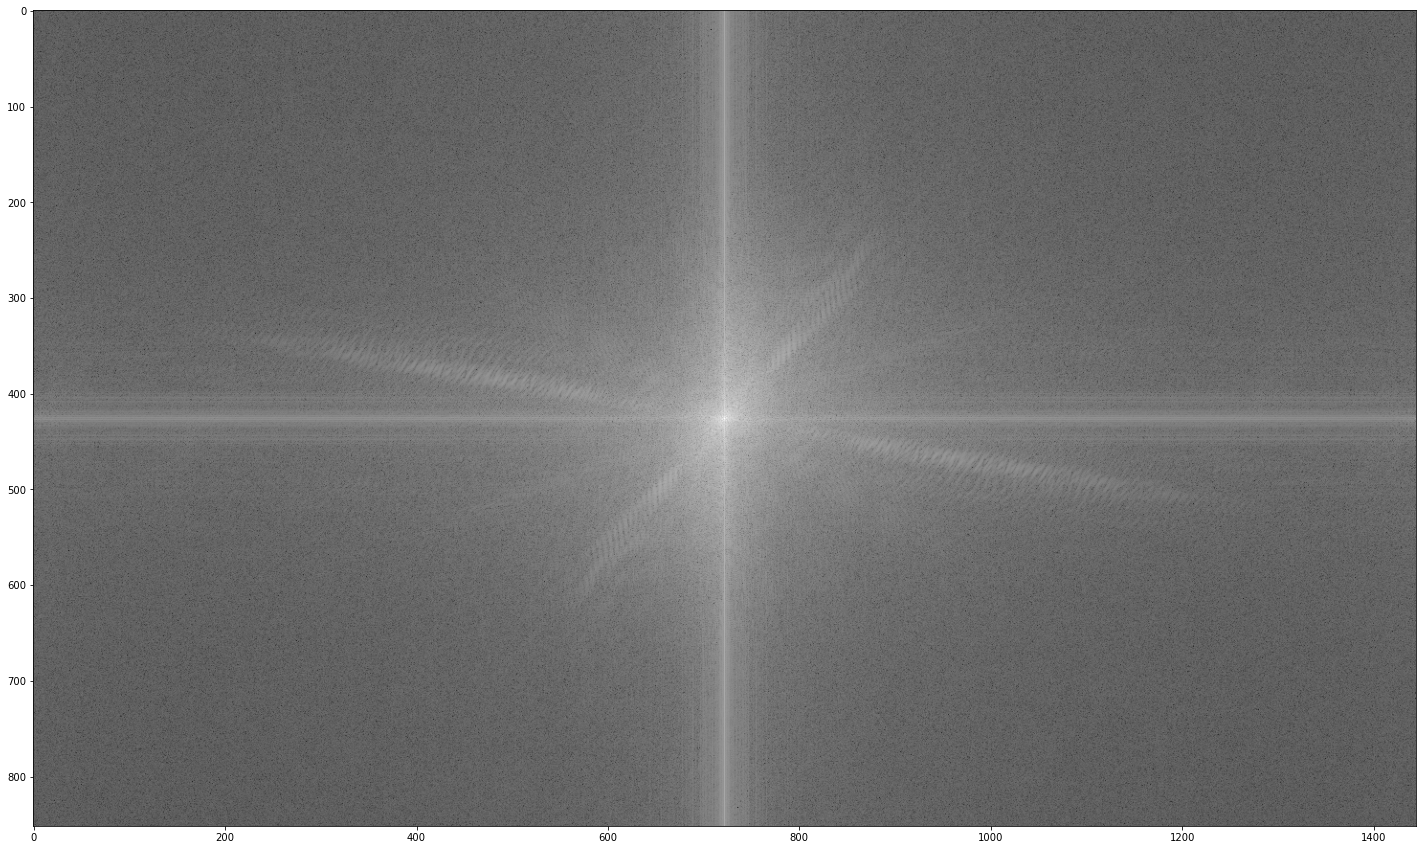

In [63]:
dft_car_r = cv2.dft(np.float32(car_r),flags = cv2.DFT_COMPLEX_OUTPUT) #Implements the DFT for Blue Intensities
dft_shift_r = np.fft.fftshift(dft_car_r) #Shifts DFT origin to point [h/2,w/2]

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift_r[:,:,0],dft_shift_r[:,:,1]))#Taking the magnitude spectrum
plt.imshow(magnitude_spectrum, cmap = 'gray') #Plotting the magnitude spectrum For Red Intensities

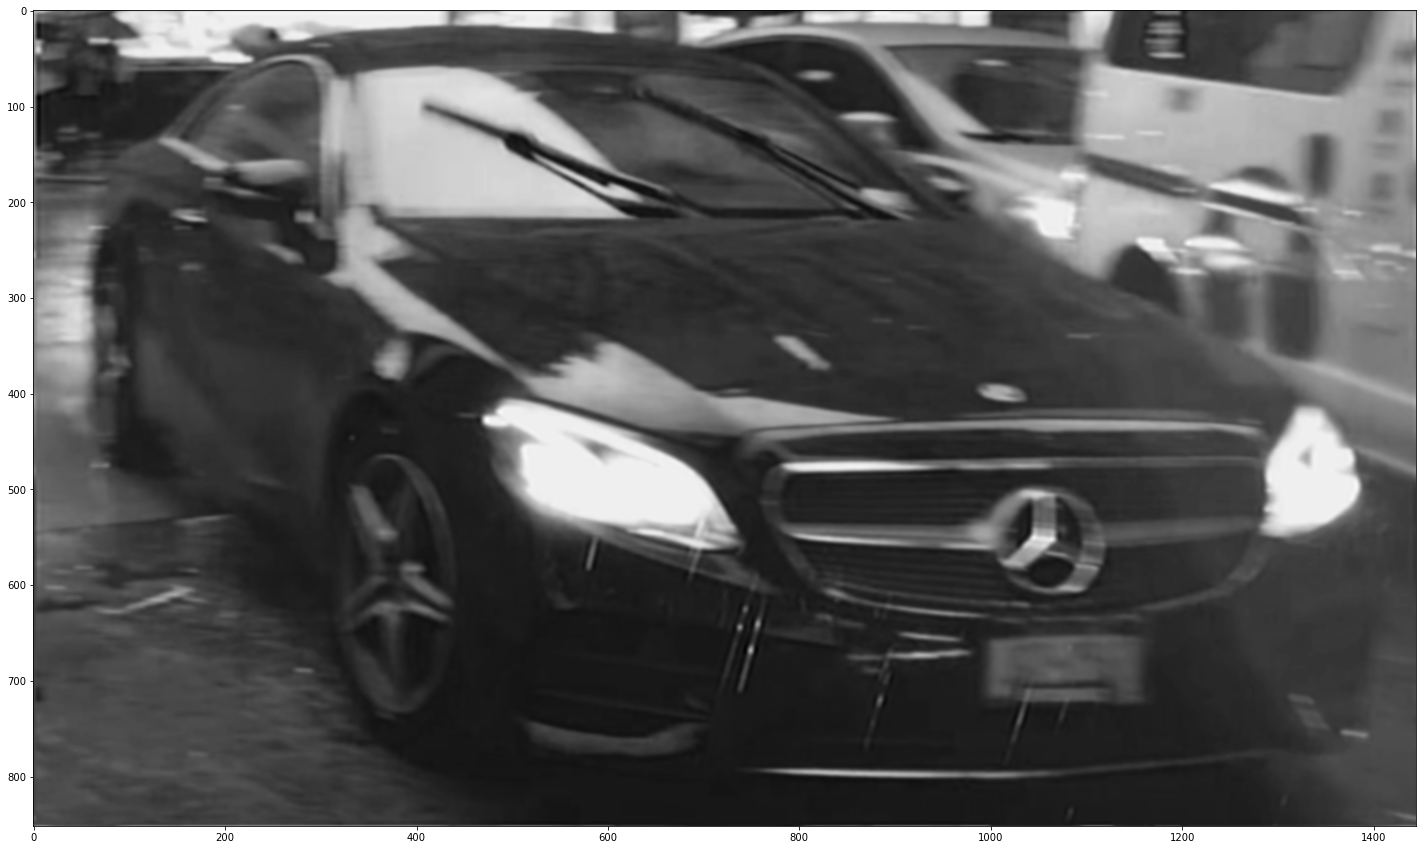

In [94]:
psf = np.zeros((11,11)) #Creating the PSF
for i in range(6): #The PSF here is a 11x11 array with first 6 entries in middle row = 1/6
    psf[5][i] = 1
psf = psf/6

#Using skimage's reiner.weiner we can obtain the deblurred image
 #Weiner filtering for RGB channels seperately
deconvolved_img_r = restoration.wiener(car_r.copy(), psf,1, clip=False) 
deconvolved_img_g = restoration.wiener(car_g.copy(), psf,1, clip=False)
deconvolved_img_b = restoration.wiener(car_b.copy(), psf,1, clip=False)

car_deblur = car_blur.copy() #Copying the image

car_b_max = np.amax(deconvolved_img_b) #Taking max of intensity values to normalise them
car_g_max = np.amax(deconvolved_img_g)
car_r_max = np.amax(deconvolved_img_r)

#Creating RGB image from the 3 channels
car_deblur = array_to_color(car_deblur,255*deconvolved_img_b/car_b_max,255*deconvolved_img_g/car_g_max,255*deconvolved_img_r/car_r_max)

plt.imshow(deconvolved_img_r, cmap = 'gray') #Plotting the red channel image
plt.imsave('test.png', deconvolved_img_r, cmap = 'gray') #Saving the image

In [95]:
#Displaying the image
cv2.imshow('Car',car_deblur)
cv2.waitKey(0) #Wait's for a keystroke
cv2.destroyAllWindows() #Destroys all windows after keystroke

cv2.imwrite('Deblur.jpg',car_deblur) #Saves the image

True

Deblurred Image
![](Deblur.jpg)

#### I ran through several different PSFs and at last this one gave some results although not perfect. PSFs of different dimensions and different values were used, like a 21x21 PSF with middle row 1/21 among many others. The image obtained above doesn't have the best deblur but the number plate is slightly more readable. One can see, although not clearly that the number is 5452

The red and yello lines in some regions are possible edge effects where the value of the centre pixel's intensity is less than 0

### 5. ML-based image restoration:
### a. Select a few images from your personal collection, and divide them into good and bad images [1]
### b. For bad images, try to figure out the degradation process (contrast, brightness, blurring, noise) [2]
### c. Split the good images into training and validation sets (by image) [0]
### d. Degrade the good images using the degradation process - contrast and brightness change, blurring, noise. [2]
### e. Create a table of size NxW2 or Nx3W2 where N is the number of patches of size WxWx1 or WxWx3 mined from the degraded versions of the training images. [2] Correspondingly, mine their associated original central pixel of size Nx3 or Nx1.

We approach the problem the following way:
Firstly, we take a dataset of bad images which are need to restored and already good images. We then add noise and blur effects to the good images and use them to train our Machine Learning model. We finally input the bad images into the trained model and review the output

In [120]:
#Reading all the bad images
Bad1 = cv2.imread('Bad/1.jpg',0) #Reads the image in B&W
Bad2 = cv2.imread('Bad/2.jpg',0) #Reads the image in B&W
Bad3 = cv2.imread('Bad/3.jpg',0) #Reads the image in B&W
Bad4 = cv2.imread('Bad/4.jpg',0) #Reads the image in B&W
Bad5 = cv2.imread('Bad/5.jpg',0) #Reads the image in B&W
Bad6 = cv2.imread('Bad/6.jpg',0) #Reads the image in B&W
Bad7 = cv2.imread('Bad/7.jpg',0) #Reads the image in B&W

Bad_images = [Bad1,Bad2,Bad3,Bad4,Bad5,Bad6,Bad7] #Arranging them all in an array

Bad images 
![](Bad/1.jpg)
![](Bad/2.jpg)
![](Bad/3.jpg)
![](Bad/4.jpg)
![](Bad/5.jpg)
![](Bad/6.jpg)
![](Bad/7.jpg)

The above is the dataset upon which we will check our model. Some images have motion blur, some have noise and some both. 

In [136]:
#Reading all the clean images
Clean1 = cv2.imread('Clean/1.jpeg',0) #Reads the image in B&W
Clean2 = cv2.imread('Clean/2.jpeg',0) #Reads the image in B&W
Clean3 = cv2.imread('Clean/3.jpeg',0) #Reads the image in B&W
Clean4 = cv2.imread('Clean/4.jpeg',0) #Reads the image in B&W
Clean5 = cv2.imread('Clean/5.jpeg',0) #Reads the image in B&W
Clean6 = cv2.imread('Clean/6.jpeg',0) #Reads the image in B&W
Clean7 = cv2.imread('Clean/7.jpeg',0) #Reads the image in B&W

Clean_images = [Clean1,Clean2,Clean3,Clean4,Clean5,Clean6,Clean7] #Arranging them all in an array

Bad images 
![](Clean/1.jpeg)
![](Clean/2.jpeg)
![](Clean/3.jpeg)
![](Clean/4.jpeg)
![](Clean/5.jpeg)
![](Clean/6.jpeg)
![](Clean/7.jpeg)

The above is the set of clean images which we will use to train our model. Source - https://www.kaggle.com/datasets/kwentar/blur-dataset

Now I have written a function to add degradation effects to these images. I have added salt and pepper noise,  poisson noise,gaussian noise, speckle noise, median blur,gaussian blur, bilateral filter.

In [145]:
def degrade_img(img):
    i = random.randint(0,6) #Randomising noise selection
    
    if(i==0): # Add salt-and-pepper noise to the image.
        deg_img = random_noise(img, mode='s&p', clip=False)

        deg_img = np.array(255*deg_img, dtype = 'uint8') 
        #As output of random_noise is between [0,1], we scale it to [0,255]
        
    elif(i==1): #poisson noise
        deg_img = random_noise(img, mode='poisson', clip=False)
    
        deg_img = np.array(255*deg_img, dtype = 'uint8')
        
    elif(i==2): #gaussian noise
        deg_img = random_noise(img, mode='gaussian', clip=False)
    
        deg_img = np.array(255*deg_img, dtype = 'uint8')
        
        
    elif(i==3): #speckle noise
    # Add salt-and-pepper noise to the image.
        deg_img = random_noise(img, mode='speckle', clip=False)

        deg_img = np.array(255*deg_img, dtype = 'uint8')   
        
           
    elif(i==4): #Median blur
        deg_img = cv2.medianBlur(img, 3)
        
    elif(i==5): #gaussian blur
        deg_img = cv2.GaussianBlur(img, (3,3),0.1) #We use 5x5 window with scale factor 0.1
     
        
    elif(i==6): #bilateral filter
        deg_img = cv2.bilateralFilter(img, 5, 75, 75)
        
    return deg_img

In [146]:
Clean_degraded = [] #Initializing empty array

Clean_degraded.append(degrade_img(Clean_images[0].copy()))
plt.imsave('Degraded/1.jpg', Clean_degraded[0], cmap = 'gray') #Saving the image

Clean_degraded.append(degrade_img(Clean_images[1].copy()))
plt.imsave('Degraded/2.jpg', Clean_degraded[1], cmap = 'gray') #Saving the image

Clean_degraded.append(degrade_img(Clean_images[2].copy()))
plt.imsave('Degraded/3.jpg', Clean_degraded[2], cmap = 'gray') #Saving the image

Clean_degraded.append(degrade_img(Clean_images[3].copy()))
plt.imsave('Degraded/4.jpg', Clean_degraded[3], cmap = 'gray') #Saving the image

Clean_degraded.append(degrade_img(Clean_images[4].copy()))
plt.imsave('Degraded/5.jpg', Clean_degraded[4], cmap = 'gray') #Saving the image

Clean_degraded.append(degrade_img(Clean_images[5].copy()))
plt.imsave('Degraded/6.jpg', Clean_degraded[5], cmap = 'gray') #Saving the image



The degraded images are 

![](Degraded/1.jpg)
![](Degraded/2.jpg)
![](Degraded/3.jpg)
![](Degraded/4.jpg)
![](Degraded/5.jpg)
![](Degraded/6.jpg)

From these degraded images, patches will be fed to the SVR model along with correct values of the center of the patch. I am taking patches of size 5x5 and 900 patches from first 4 images for training. The last 2 images will be used for validation. My testing dataset will have all the bad images from earlier. 900 patches because more patches result in more computation time and also the chance of a patch being selected again increases as they are selected randomly.  

In [147]:
A=[] #Initializing empty arrays
B=[]
for x in range(len(Clean_images)-2): #Not including last 2 images
    for sample in range(900):
        i = random.randint(2, len(Clean_degraded[x])-3) #Excluding the edge pixels
        j = random.randint(2, len(Clean_degraded[x][0])-3)
        A.append(Clean_degraded[x][i-2:i+3,j-2:j+3].flatten()) #SVR only takes 1-D arrays as input
        B.append(Clean_images[x][i][j]) 
        


In [148]:
from sklearn.svm import SVR #Importing the sklearn.svm library
from sklearn.model_selection import GridSearchCV

# For parameter values I referred https://www.section.io/engineering-education/grid-search/
parameters = {
    "kernel": ["rbf"],
    "C": [1,10,10,100,1000],
    "gamma": [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    }

regressor = GridSearchCV(SVR(), parameters, cv=5, verbose=2)
regressor.fit(A,B)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .......................C=1, gamma=1e-08, kernel=rbf; total time=   1.3s
[CV] END .......................C=1, gamma=1e-08, kernel=rbf; total time=   1.2s
[CV] END .......................C=1, gamma=1e-08, kernel=rbf; total time=   1.2s
[CV] END .......................C=1, gamma=1e-08, kernel=rbf; total time=   1.3s
[CV] END .......................C=1, gamma=1e-08, kernel=rbf; total time=   1.2s
[CV] END .......................C=1, gamma=1e-07, kernel=rbf; total time=   1.2s
[CV] END .......................C=1, gamma=1e-07, kernel=rbf; total time=   1.3s
[CV] END .......................C=1, gamma=1e-07, kernel=rbf; total time=   1.2s
[CV] END .......................C=1, gamma=1e-07, kernel=rbf; total time=   1.3s
[CV] END .......................C=1, gamma=1e-07, kernel=rbf; total time=   1.2s
[CV] END .......................C=1, gamma=1e-06, kernel=rbf; total time=   1.2s
[CV] END .......................C=1, gamma=1e-0

[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   1.2s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   1.2s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   1.2s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   1.2s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   1.2s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   1.2s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   1.2s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   1.2s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   1.2s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 10, 100, 1000],
                         'gamma': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1],
                         'kernel': ['rbf']},
             verbose=2)

In [149]:
from sklearn.metrics import mean_squared_error

B_pred = regressor.predict(A)
mean_squared_error(B_pred, B)

247.88266124422745

Using the last 2 images for validation of our model

In [150]:
test = Clean_degraded[4].copy() #Copying the image
result = test.copy()
for i in range(2,len(test)-2): #Looping over all patches
    for j in range(2,len(test[0])-2): #
        patch = test[i-2:i+3,j-2:j+3].flatten()
        #print(patch)
        result[i][j] = regressor.predict([patch]) #Predicting the center pixel from the patch
        #print(result[i][j])
plt.imsave('Validation/5.jpg', result, cmap = 'gray') #Saving the image

In [151]:
test = Clean_degraded[5].copy()  #Copying the image
result = test.copy()
for i in range(2,len(test)-2):  #Looping over all patches
    for j in range(2,len(test[0])-2): #
        patch = test[i-2:i+3,j-2:j+3].flatten()
        #print(patch)
        result[i][j] = regressor.predict([patch]) #Predicting the center pixel from the patch
        #print(result[i][j])
plt.imsave('Validation/6.jpg', result, cmap = 'gray') #Saving the image

Validation Images
![](Validation/5.jpg)
![](Validation/6.jpg)

The validation images look much better than their degraded counterparts. Let's test our model on the set of bad images.

In [153]:
test = Bad_images[0].copy()  #Copying the image
result = test.copy()
for i in range(2,len(test)-2):  #Looping over all patches
    for j in range(2,len(test[0])-2): #
        patch = test[i-2:i+3,j-2:j+3].flatten()
        #print(patch)
        result[i][j] = regressor.predict([patch]) #Predicting the center pixel from the patch
        #print(result[i][j])
plt.imsave('Results/1.jpg', result, cmap = 'gray') #Saving the image

In [154]:
test = Bad_images[1].copy()  #Copying the image
result = test.copy()
for i in range(2,len(test)-2):  #Looping over all patches
    for j in range(2,len(test[0])-2): #
        patch = test[i-2:i+3,j-2:j+3].flatten()
        #print(patch)
        result[i][j] = regressor.predict([patch]) #Predicting the center pixel from the patch
        #print(result[i][j])
plt.imsave('Results/2.jpg', result, cmap = 'gray') #Saving the image

In [155]:
test = Bad_images[2].copy()  #Copying the image
result = test.copy()
for i in range(2,len(test)-2):  #Looping over all patches
    for j in range(2,len(test[0])-2): #
        patch = test[i-2:i+3,j-2:j+3].flatten()
        #print(patch)
        result[i][j] = regressor.predict([patch]) #Predicting the center pixel from the patch
        #print(result[i][j])
plt.imsave('Results/3.jpg', result, cmap = 'gray') #Saving the image

In [156]:
test = Bad_images[3].copy()  #Copying the image
result = test.copy()
for i in range(2,len(test)-2):  #Looping over all patches
    for j in range(2,len(test[0])-2): #
        patch = test[i-2:i+3,j-2:j+3].flatten()
        #print(patch)
        result[i][j] = regressor.predict([patch]) #Predicting the center pixel from the patch
        #print(result[i][j])
plt.imsave('Results/4.jpg', result, cmap = 'gray') #Saving the image

In [157]:
test = Bad_images[4].copy()  #Copying the image
result = test.copy()
for i in range(2,len(test)-2):  #Looping over all patches
    for j in range(2,len(test[0])-2): #
        patch = test[i-2:i+3,j-2:j+3].flatten()
        #print(patch)
        result[i][j] = regressor.predict([patch]) #Predicting the center pixel from the patch
        #print(result[i][j])
plt.imsave('Results/5.jpg', result, cmap = 'gray') #Saving the image

In [158]:
test = Bad_images[5].copy()  #Copying the image
result = test.copy()
for i in range(2,len(test)-2):  #Looping over all patches
    for j in range(2,len(test[0])-2): #
        patch = test[i-2:i+3,j-2:j+3].flatten()
        #print(patch)
        result[i][j] = regressor.predict([patch]) #Predicting the center pixel from the patch
        #print(result[i][j])
plt.imsave('Results/6.jpg', result, cmap = 'gray') #Saving the image

In [159]:
test = Bad_images[6].copy()  #Copying the image
result = test.copy()
for i in range(2,len(test)-2):  #Looping over all patches
    for j in range(2,len(test[0])-2): #
        patch = test[i-2:i+3,j-2:j+3].flatten()
        #print(patch)
        result[i][j] = regressor.predict([patch]) #Predicting the center pixel from the patch
        #print(result[i][j])
plt.imsave('Results/7.jpg', result, cmap = 'gray') #Saving the image

Resulting Images 
![](Results/1.jpg)
![](Results/2.jpg)
![](Results/3.jpg)
![](Results/4.jpg)
![](Results/5.jpg)
![](Results/6.jpg)
![](Results/7.jpg)


The images obtained have much lesser noise and are a lot clearer than their original. However not much change is visible in images with motion blur. The training set I used doesn't have as much motion blur as the set of bad images, thus not good enough results for those images. However it is better at removing small blur effects and background noise in the image.